# 1. Loading library

In [1]:
from __future__ import division
import matplotlib
import numpy as np
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import h5py
import os
import re
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4)})
plotStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
np.seterr(divide='ignore',invalid='ignore')
from matplotlib import pyplot
from matplotlib.colors import LogNorm
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import time

In [2]:
dir="/media/bciezah1/BCH_USB_2/FUS/"

# 2. Particle concentration versus time

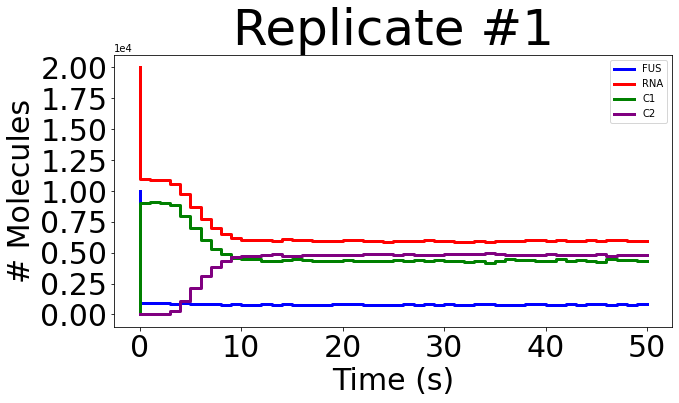

In [3]:
N1=[9.103e-04]
N2=[2.947e-08]
figure(figsize = (10,5));
jump1=3
replicate=1
for x1 in N1:
    for x2 in N2:
        filename1 = dir+"k3_%0.3e_and_k5_%0.3e_100x100.lm"%(x1,x2)
        #filename1 = dir +  "k3_1.000e+01_and_k5_1.000e-10_100x100.lm"
        fp1 = h5py.File(filename1, "r")
        counts=fp1["/Simulations/%07d/SpeciesCounts"%replicate]
        times1=fp1["/Simulations/%07d/SpeciesCountTimes"%replicate]
        startTimestep=0
        endTimestep=len(times1)
        for replicate in range(1,2):
            counts=fp1["/Simulations/%07d/SpeciesCounts"%replicate]
            times=fp1["/Simulations/%07d/SpeciesCountTimes"%replicate]
            step(times[startTimestep:endTimestep],counts[startTimestep:endTimestep,0],color='blue',linewidth=3,label="FUS")
            step(times[startTimestep:endTimestep],counts[startTimestep:endTimestep,1],color='red',linewidth=3,label="RNA")
            step(times[startTimestep:endTimestep],counts[startTimestep:endTimestep,2],color='green',linewidth=3,label="C1")
            step(times[startTimestep:endTimestep],counts[startTimestep:endTimestep,3],color='purple',linewidth=3,label="C2")
        pass
xlabel('Time (s)',fontsize=30); ylabel('# Molecules',fontsize=30); 
title('Replicate #1',fontsize=50);
plt.xticks(fontsize=30);plt.yticks(fontsize=30)
legend(fontsize=10)
plt.show()

# 3. Particle Distribution

/media/bciezah1/BCH_USB_2/FUS/k3_9.103e-04_and_k5_2.812e-10_100x100.lm
ready


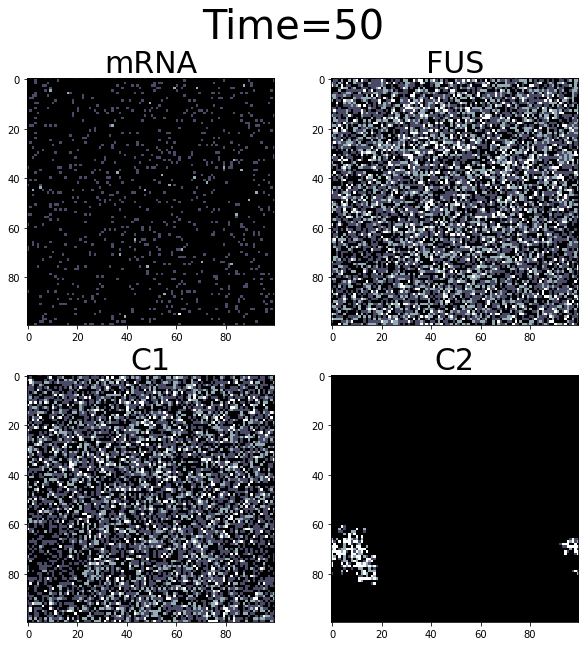

In [20]:
replicate=1
counting=0
N1 = [9.103e-04]
N2 = [2.812e-10]
for x1 in N1:
    for x2 in N2:
        counting=counting+1
        filename1 =dir+"k3_%0.3e_and_k5_%0.3e_100x100.lm"%(x1,x2)
        print(filename1)
        fp1 = h5py.File(filename1, "r")
        lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
        startTimestep=0
        endTimestep=len(times1)
        count=0
        #print(lattices)
        lattices=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())
        for lattice in lattices:
            if 49<int(lattice)<51:
                fig=figure(figsize = (10,10));
                plt.suptitle("Time=%0.3s"%(int(lattice)), fontsize=40)
                lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
                SumParticlesX2=np.sum(lfull==0,axis=3) #Count Particles of Type X1
                TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
                plt.subplot(2,2, 1);
                plt.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=3,cmap=cm.bone);
                plt.title('mRNA', fontsize=30)
                    #title("k1_%0.3e_and_k3_%0.3e."%(x1,x2),fontsize=20);plt.xticks(fontsize=20);plt.yticks(fontsize=20) 
                #plt.savefig("4.png");
                #plt.close(fig)

                SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
                TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
                plt.subplot(2,2, 2);
                plt.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=3,cmap=cm.bone);
                plt.title('FUS', fontsize=30)

                SumParticlesX2=np.sum(lfull==2,axis=3) #Count Particles of Type X1
                TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
                plt.subplot(2,2, 3);
                plt.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=3,cmap=cm.bone);
                plt.title('C1', fontsize=30)

                SumParticlesX2=np.sum(lfull==3,axis=3) #Count Particles of Type X1
                TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
                plt.subplot(2,2, 4);
                plt.title('C2', fontsize=30)
                plt.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=3,cmap=cm.bone);
                plt.savefig("k3_%0.3e_and_k5_%0.3e_100x100_lat_%0.3s.pdf"%(x1,x2,int(lattice)));
                #plt.close(fig)
print("ready")

# 4. Defining $\phi$ Function

In [62]:
def phi_function(filename):
    fp1 = h5py.File(filename, "r")
    times=np.array(fp1["/Simulations/%07d/SpeciesCountTimes"%replicate], dtype=double)
    lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
    lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
    latticelength=100
    # Get particle coordinates for xr
    lc1 = np.sum(lfull == 0, axis=3).reshape((lfull.shape[0], lfull.shape[1]))
    # Get particle coordinates for fus
    lc2 = np.sum(lfull == 1,axis=3).reshape((lfull.shape[0], lfull.shape[1]))
    # Get particle coordinates for c1
    lc3 = np.sum(lfull == 2, axis=3).reshape((lfull.shape[0], lfull.shape[1]))
    # Get particle coordinates for c2
    lc4 = np.sum(lfull == 3,axis=3).reshape((lfull.shape[0], lfull.shape[1]))

            # Get realistic "experimental" lattice data (from fluorescence intensities)
    overall_lattice =   lc1 + lc2 + 2 * lc3 + 3 * lc4 
    #print(np.sum(lc2))
    if np.sum(lc4) == 0 or np.sum(lc4) ==1:
        weighted_average_pairwise_distance = 1
    else:
        normalized_lattice = overall_lattice / 10

        x_coord, y_coord = normalized_lattice.nonzero()

                # calculate the pairwise distances (accounting for periodic boundary conditions)
        squared_distances = 0
        for distance_1D in [x_coord, y_coord]:
                    # Get the 1D distances
                pd = pdist(distance_1D.reshape(distance_1D.shape[0], 1))

                    # apply periodic boundary conditions
                pd[pd > latticelength * 0.5] = latticelength - pd[pd > latticelength * 0.5]

                squared_distances += pd ** 2
        pairwise_distances = np.sqrt(squared_distances)

                # weight the pairwise distances by the normalized fluorescence intensities
        weights_for_dist = []
        for i in range(len(x_coord) - 1):
                for j in range(i + 1, len(x_coord)):
                        weights_for_dist.append(
                        normalized_lattice[x_coord[i], y_coord[i]] * normalized_lattice[x_coord[j], y_coord[j]])
        weighted_average_pairwise_distance = np.log(float(np.average(pairwise_distances, weights=weights_for_dist))/38.26)
        #print(weighted_average_pairwise_distance,np.sum(lc1),2*np.sum(lc2))
    #return weighted_average_pairwise_distance,np.sum(lc1)+np.sum(lc2)+np.sum(lc3)*2+np.sum(lc4)*3,np.sum(lc4)
    return weighted_average_pairwise_distance

# 5. Testing $\phi$ function on one trajectory example

In [77]:
N1 = [1.526e-03]
N2 = [2.223e-09]
#rep6, rep7 rep8, rep11
#latticelength=-5
count = 0
replicate=1
PhaseMatrixBOB=np.zeros((len(N1),len(N2),5), dtype=float)
for nrep in range(1,2):
    countx1=-1
    for x1 in N1:      #k3 coef #x1
        countx1=countx1+1
        countx2=-1
        for x2 in N2:  #diff coef #x2
            count = count + 1
            print('replicate:',nrep,count)
            countx2=countx2+1
            n0=0
            filename =dir+"k3_%0.3e_and_k5_%0.3e_100x100.lm"%(x1,x2)
            print(filename)
            theta_data = phi_function(filename)
            #PhaseMatrixBOB[:,:,nrep-6][countx1][countx2]=float(theta_data[0])
            #print("xr: ",x1,"fus: ",x2, "C2: ", theta_data[2], "phi: ",theta_data[0],"total: ",theta_data[1])
            print(theta_data)
print("ready")

replicate: 1 1
/media/bciezah1/BCH_USB_2/FUS/k3_1.526e-03_and_k5_2.223e-09_100x100.lm
-0.014285104767550792
ready


# 6. Phase diagram

#### 6.1 Calc $\phi$ for each trajectory

In [73]:
N1 = np.logspace(-10,+1,num=50)
N2 = np.logspace(-10,+1,num=50)
replicate = 1
count = 0
replicate=1
phase_matrix_xr_vs_fus=np.zeros((len(N1),len(N2),2), dtype=float)
for nrep in range(1,2):
    countx1=-1
    for x1 in N1:      #k3 coef #x1
        countx1=countx1+1
        countx2=-1
        for x2 in N2:  #diff coef #x2
            count = count + 1
            countx2=countx2+1
            n0=0
            filename = "/media/bciezah1/BCH_USB_2/FUS/k3_%0.3e_and_k5_%0.3e_100x100.lm"%(x1,x2)
            print(filename)
            fp1 = h5py.File(filename, "r")
            lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
            lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
            theta_data = phi_function(filename)
            print('replicate:',nrep,count,"theta: ", theta_data)
            phase_matrix_xr_vs_fus[:,:,nrep-1][countx1][countx2]=float(theta_data)
            #print("k3: ",x1,"k5: ",x2, "C2: ", theta_data[2], "phi: ",theta_data[0],"total: ",theta_data[1])
print("ready")

/media/bciezah1/BCH_USB_2/FUS/k3_1.000e-10_and_k5_1.000e-10_100x100.lm
replicate: 1 1 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.000e-10_and_k5_1.677e-10_100x100.lm
replicate: 1 2 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.000e-10_and_k5_2.812e-10_100x100.lm
replicate: 1 3 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.000e-10_and_k5_4.715e-10_100x100.lm
replicate: 1 4 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.000e-10_and_k5_7.906e-10_100x100.lm
replicate: 1 5 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.000e-10_and_k5_1.326e-09_100x100.lm
replicate: 1 6 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.000e-10_and_k5_2.223e-09_100x100.lm
replicate: 1 7 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.000e-10_and_k5_3.728e-09_100x100.lm
replicate: 1 8 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.000e-10_and_k5_6.251e-09_100x100.lm
replicate: 1 9 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.000e-10_and_k5_1.048e-08_100x100.lm
replicate: 1 10 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.000e

replicate: 1 84 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.677e-10_and_k5_4.292e-03_100x100.lm
replicate: 1 85 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.677e-10_and_k5_7.197e-03_100x100.lm
replicate: 1 86 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.677e-10_and_k5_1.207e-02_100x100.lm
replicate: 1 87 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.677e-10_and_k5_2.024e-02_100x100.lm
replicate: 1 88 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.677e-10_and_k5_3.393e-02_100x100.lm
replicate: 1 89 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.677e-10_and_k5_5.690e-02_100x100.lm
replicate: 1 90 theta:  0.00015913075627532028
/media/bciezah1/BCH_USB_2/FUS/k3_1.677e-10_and_k5_9.541e-02_100x100.lm
replicate: 1 91 theta:  0.0001692143909134074
/media/bciezah1/BCH_USB_2/FUS/k3_1.677e-10_and_k5_1.600e-01_100x100.lm
replicate: 1 92 theta:  0.000182762260432803
/media/bciezah1/BCH_USB_2/FUS/k3_1.677e-10_and_k5_2.683e-01_100x100.lm
replicate: 1 93 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.677e-1

replicate: 1 166 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_4.715e-10_and_k5_3.907e-07_100x100.lm
replicate: 1 167 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_4.715e-10_and_k5_6.551e-07_100x100.lm
replicate: 1 168 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_4.715e-10_and_k5_1.099e-06_100x100.lm
replicate: 1 169 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_4.715e-10_and_k5_1.842e-06_100x100.lm
replicate: 1 170 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_4.715e-10_and_k5_3.089e-06_100x100.lm
replicate: 1 171 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_4.715e-10_and_k5_5.179e-06_100x100.lm
replicate: 1 172 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_4.715e-10_and_k5_8.685e-06_100x100.lm
replicate: 1 173 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_4.715e-10_and_k5_1.456e-05_100x100.lm
replicate: 1 174 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_4.715e-10_and_k5_2.442e-05_100x100.lm
replicate: 1 175 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_4.715e-10_and_k5_4.095e-05_100x100.lm
replicate: 1 176 the

replicate: 1 246 theta:  0.00018625857502347227
/media/bciezah1/BCH_USB_2/FUS/k3_7.906e-10_and_k5_2.121e+00_100x100.lm
replicate: 1 247 theta:  0.00016946375606797853
/media/bciezah1/BCH_USB_2/FUS/k3_7.906e-10_and_k5_3.556e+00_100x100.lm
replicate: 1 248 theta:  0.0001527962148791208
/media/bciezah1/BCH_USB_2/FUS/k3_7.906e-10_and_k5_5.964e+00_100x100.lm
replicate: 1 249 theta:  0.0001357395487662708
/media/bciezah1/BCH_USB_2/FUS/k3_7.906e-10_and_k5_1.000e+01_100x100.lm
replicate: 1 250 theta:  0.0001811379371626834
/media/bciezah1/BCH_USB_2/FUS/k3_1.326e-09_and_k5_1.000e-10_100x100.lm
replicate: 1 251 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.326e-09_and_k5_1.677e-10_100x100.lm
replicate: 1 252 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.326e-09_and_k5_2.812e-10_100x100.lm
replicate: 1 253 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.326e-09_and_k5_4.715e-10_100x100.lm
replicate: 1 254 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.326e-09_and_k5_7.906e-10_100x100.lm
replicate: 1 255

replicate: 1 326 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_2.223e-09_and_k5_6.866e-05_100x100.lm
replicate: 1 327 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_2.223e-09_and_k5_1.151e-04_100x100.lm
replicate: 1 328 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_2.223e-09_and_k5_1.931e-04_100x100.lm
replicate: 1 329 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_2.223e-09_and_k5_3.237e-04_100x100.lm
replicate: 1 330 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_2.223e-09_and_k5_5.429e-04_100x100.lm
replicate: 1 331 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_2.223e-09_and_k5_9.103e-04_100x100.lm
replicate: 1 332 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_2.223e-09_and_k5_1.526e-03_100x100.lm
replicate: 1 333 theta:  0.00018245471025924703
/media/bciezah1/BCH_USB_2/FUS/k3_2.223e-09_and_k5_2.560e-03_100x100.lm
replicate: 1 334 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_2.223e-09_and_k5_4.292e-03_100x100.lm
replicate: 1 335 theta:  0.0001874268470919747
/media/bciezah1/BCH_USB_2/FUS/k3_2.223e-09_and_k5_

replicate: 1 404 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_6.251e-09_and_k5_7.906e-10_100x100.lm
replicate: 1 405 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_6.251e-09_and_k5_1.326e-09_100x100.lm
replicate: 1 406 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_6.251e-09_and_k5_2.223e-09_100x100.lm
replicate: 1 407 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_6.251e-09_and_k5_3.728e-09_100x100.lm
replicate: 1 408 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_6.251e-09_and_k5_6.251e-09_100x100.lm
replicate: 1 409 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_6.251e-09_and_k5_1.048e-08_100x100.lm
replicate: 1 410 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_6.251e-09_and_k5_1.758e-08_100x100.lm
replicate: 1 411 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_6.251e-09_and_k5_2.947e-08_100x100.lm
replicate: 1 412 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_6.251e-09_and_k5_4.942e-08_100x100.lm
replicate: 1 413 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_6.251e-09_and_k5_8.286e-08_100x100.lm
replicate: 1 414 the

replicate: 1 484 theta:  0.0001926484774610535
/media/bciezah1/BCH_USB_2/FUS/k3_1.048e-08_and_k5_4.292e-03_100x100.lm
replicate: 1 485 theta:  0.00014508681313220529
/media/bciezah1/BCH_USB_2/FUS/k3_1.048e-08_and_k5_7.197e-03_100x100.lm
replicate: 1 486 theta:  0.00016635603471170564
/media/bciezah1/BCH_USB_2/FUS/k3_1.048e-08_and_k5_1.207e-02_100x100.lm
replicate: 1 487 theta:  0.00017377739002413228
/media/bciezah1/BCH_USB_2/FUS/k3_1.048e-08_and_k5_2.024e-02_100x100.lm
replicate: 1 488 theta:  0.00016700096411143822
/media/bciezah1/BCH_USB_2/FUS/k3_1.048e-08_and_k5_3.393e-02_100x100.lm
replicate: 1 489 theta:  0.00014150304763843596
/media/bciezah1/BCH_USB_2/FUS/k3_1.048e-08_and_k5_5.690e-02_100x100.lm
replicate: 1 490 theta:  0.00016303611725657893
/media/bciezah1/BCH_USB_2/FUS/k3_1.048e-08_and_k5_9.541e-02_100x100.lm
replicate: 1 491 theta:  0.00015863971387568908
/media/bciezah1/BCH_USB_2/FUS/k3_1.048e-08_and_k5_1.600e-01_100x100.lm
replicate: 1 492 theta:  0.00017387821672575836
/

replicate: 1 562 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_2.947e-08_and_k5_4.942e-08_100x100.lm
replicate: 1 563 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_2.947e-08_and_k5_8.286e-08_100x100.lm
replicate: 1 564 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_2.947e-08_and_k5_1.389e-07_100x100.lm
replicate: 1 565 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_2.947e-08_and_k5_2.330e-07_100x100.lm
replicate: 1 566 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_2.947e-08_and_k5_3.907e-07_100x100.lm
replicate: 1 567 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_2.947e-08_and_k5_6.551e-07_100x100.lm
replicate: 1 568 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_2.947e-08_and_k5_1.099e-06_100x100.lm
replicate: 1 569 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_2.947e-08_and_k5_1.842e-06_100x100.lm
replicate: 1 570 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_2.947e-08_and_k5_3.089e-06_100x100.lm
replicate: 1 571 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_2.947e-08_and_k5_5.179e-06_100x100.lm
replicate: 1 572 the

replicate: 1 639 theta:  0.0001940447502095747
/media/bciezah1/BCH_USB_2/FUS/k3_4.942e-08_and_k5_5.690e-02_100x100.lm
replicate: 1 640 theta:  0.00018699327213283316
/media/bciezah1/BCH_USB_2/FUS/k3_4.942e-08_and_k5_9.541e-02_100x100.lm
replicate: 1 641 theta:  0.000158576234117932
/media/bciezah1/BCH_USB_2/FUS/k3_4.942e-08_and_k5_1.600e-01_100x100.lm
replicate: 1 642 theta:  0.00017801752695879598
/media/bciezah1/BCH_USB_2/FUS/k3_4.942e-08_and_k5_2.683e-01_100x100.lm
replicate: 1 643 theta:  0.0001704128901416557
/media/bciezah1/BCH_USB_2/FUS/k3_4.942e-08_and_k5_4.498e-01_100x100.lm
replicate: 1 644 theta:  0.0001616032117440219
/media/bciezah1/BCH_USB_2/FUS/k3_4.942e-08_and_k5_7.543e-01_100x100.lm
replicate: 1 645 theta:  0.00014581430588433907
/media/bciezah1/BCH_USB_2/FUS/k3_4.942e-08_and_k5_1.265e+00_100x100.lm
replicate: 1 646 theta:  0.00016519676368908647
/media/bciezah1/BCH_USB_2/FUS/k3_4.942e-08_and_k5_2.121e+00_100x100.lm
replicate: 1 647 theta:  0.00018974517604516324
/medi

replicate: 1 716 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.389e-07_and_k5_3.907e-07_100x100.lm
replicate: 1 717 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.389e-07_and_k5_6.551e-07_100x100.lm
replicate: 1 718 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.389e-07_and_k5_1.099e-06_100x100.lm
replicate: 1 719 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.389e-07_and_k5_1.842e-06_100x100.lm
replicate: 1 720 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.389e-07_and_k5_3.089e-06_100x100.lm
replicate: 1 721 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.389e-07_and_k5_5.179e-06_100x100.lm
replicate: 1 722 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.389e-07_and_k5_8.685e-06_100x100.lm
replicate: 1 723 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.389e-07_and_k5_1.456e-05_100x100.lm
replicate: 1 724 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.389e-07_and_k5_2.442e-05_100x100.lm
replicate: 1 725 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_1.389e-07_and_k5_4.095e-05_100x100.lm
replicate: 1 726 the

replicate: 1 792 theta:  0.00017828570503948115
/media/bciezah1/BCH_USB_2/FUS/k3_2.330e-07_and_k5_2.683e-01_100x100.lm
replicate: 1 793 theta:  0.0001918240090176147
/media/bciezah1/BCH_USB_2/FUS/k3_2.330e-07_and_k5_4.498e-01_100x100.lm
replicate: 1 794 theta:  0.00017107878041236913
/media/bciezah1/BCH_USB_2/FUS/k3_2.330e-07_and_k5_7.543e-01_100x100.lm
replicate: 1 795 theta:  0.0001924250221524939
/media/bciezah1/BCH_USB_2/FUS/k3_2.330e-07_and_k5_1.265e+00_100x100.lm
replicate: 1 796 theta:  0.00014562141995479093
/media/bciezah1/BCH_USB_2/FUS/k3_2.330e-07_and_k5_2.121e+00_100x100.lm
replicate: 1 797 theta:  0.00019259524275044038
/media/bciezah1/BCH_USB_2/FUS/k3_2.330e-07_and_k5_3.556e+00_100x100.lm
replicate: 1 798 theta:  0.0001913859705174675
/media/bciezah1/BCH_USB_2/FUS/k3_2.330e-07_and_k5_5.964e+00_100x100.lm
replicate: 1 799 theta:  0.0001909375310214052
/media/bciezah1/BCH_USB_2/FUS/k3_2.330e-07_and_k5_1.000e+01_100x100.lm
replicate: 1 800 theta:  0.00020082306406960028
/med

replicate: 1 868 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_6.551e-07_and_k5_1.099e-06_100x100.lm
replicate: 1 869 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_6.551e-07_and_k5_1.842e-06_100x100.lm
replicate: 1 870 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_6.551e-07_and_k5_3.089e-06_100x100.lm
replicate: 1 871 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_6.551e-07_and_k5_5.179e-06_100x100.lm
replicate: 1 872 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_6.551e-07_and_k5_8.685e-06_100x100.lm
replicate: 1 873 theta:  0.00018164622321385792
/media/bciezah1/BCH_USB_2/FUS/k3_6.551e-07_and_k5_1.456e-05_100x100.lm
replicate: 1 874 theta:  0.00019488281412942046
/media/bciezah1/BCH_USB_2/FUS/k3_6.551e-07_and_k5_2.442e-05_100x100.lm
replicate: 1 875 theta:  0.0001745660518482076
/media/bciezah1/BCH_USB_2/FUS/k3_6.551e-07_and_k5_4.095e-05_100x100.lm
replicate: 1 876 theta:  0.00017810853004561535
/media/bciezah1/BCH_USB_2/FUS/k3_6.551e-07_and_k5_6.866e-05_100x100.lm
replicate: 1 877 theta:  0.00017818

replicate: 1 942 theta:  0.00020085763949395305
/media/bciezah1/BCH_USB_2/FUS/k3_1.099e-06_and_k5_2.683e-01_100x100.lm
replicate: 1 943 theta:  0.0001286569440308684
/media/bciezah1/BCH_USB_2/FUS/k3_1.099e-06_and_k5_4.498e-01_100x100.lm
replicate: 1 944 theta:  0.00019139632252721482
/media/bciezah1/BCH_USB_2/FUS/k3_1.099e-06_and_k5_7.543e-01_100x100.lm
replicate: 1 945 theta:  0.00017663918391715898
/media/bciezah1/BCH_USB_2/FUS/k3_1.099e-06_and_k5_1.265e+00_100x100.lm
replicate: 1 946 theta:  0.00019934189618440234
/media/bciezah1/BCH_USB_2/FUS/k3_1.099e-06_and_k5_2.121e+00_100x100.lm
replicate: 1 947 theta:  0.0001092367117130003
/media/bciezah1/BCH_USB_2/FUS/k3_1.099e-06_and_k5_3.556e+00_100x100.lm
replicate: 1 948 theta:  0.00018025072136611841
/media/bciezah1/BCH_USB_2/FUS/k3_1.099e-06_and_k5_5.964e+00_100x100.lm
replicate: 1 949 theta:  0.0001900821351602541
/media/bciezah1/BCH_USB_2/FUS/k3_1.099e-06_and_k5_1.000e+01_100x100.lm
replicate: 1 950 theta:  0.0001628151860467861
/med

replicate: 1 1020 theta:  0.00015940767985230336
/media/bciezah1/BCH_USB_2/FUS/k3_3.089e-06_and_k5_3.089e-06_100x100.lm
replicate: 1 1021 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_3.089e-06_and_k5_5.179e-06_100x100.lm
replicate: 1 1022 theta:  0.00015809315834345002
/media/bciezah1/BCH_USB_2/FUS/k3_3.089e-06_and_k5_8.685e-06_100x100.lm
replicate: 1 1023 theta:  0.00018534044482894745
/media/bciezah1/BCH_USB_2/FUS/k3_3.089e-06_and_k5_1.456e-05_100x100.lm
replicate: 1 1024 theta:  0.00018063250232935207
/media/bciezah1/BCH_USB_2/FUS/k3_3.089e-06_and_k5_2.442e-05_100x100.lm
replicate: 1 1025 theta:  0.000185065910461729
/media/bciezah1/BCH_USB_2/FUS/k3_3.089e-06_and_k5_4.095e-05_100x100.lm
replicate: 1 1026 theta:  0.00019190989692081202
/media/bciezah1/BCH_USB_2/FUS/k3_3.089e-06_and_k5_6.866e-05_100x100.lm
replicate: 1 1027 theta:  0.00016408878856249179
/media/bciezah1/BCH_USB_2/FUS/k3_3.089e-06_and_k5_1.151e-04_100x100.lm
replicate: 1 1028 theta:  0.0001758509406101264
/media/bciezah1

replicate: 1 1092 theta:  0.000205057347634794
/media/bciezah1/BCH_USB_2/FUS/k3_5.179e-06_and_k5_2.683e-01_100x100.lm
replicate: 1 1093 theta:  0.000156362514902845
/media/bciezah1/BCH_USB_2/FUS/k3_5.179e-06_and_k5_4.498e-01_100x100.lm
replicate: 1 1094 theta:  0.00015046926823295784
/media/bciezah1/BCH_USB_2/FUS/k3_5.179e-06_and_k5_7.543e-01_100x100.lm
replicate: 1 1095 theta:  0.0001948497505201126
/media/bciezah1/BCH_USB_2/FUS/k3_5.179e-06_and_k5_1.265e+00_100x100.lm
replicate: 1 1096 theta:  4.995987277902322e-05
/media/bciezah1/BCH_USB_2/FUS/k3_5.179e-06_and_k5_2.121e+00_100x100.lm
replicate: 1 1097 theta:  0.00015433560044972815
/media/bciezah1/BCH_USB_2/FUS/k3_5.179e-06_and_k5_3.556e+00_100x100.lm
replicate: 1 1098 theta:  0.00011927226588699075
/media/bciezah1/BCH_USB_2/FUS/k3_5.179e-06_and_k5_5.964e+00_100x100.lm
replicate: 1 1099 theta:  0.0001888539602139572
/media/bciezah1/BCH_USB_2/FUS/k3_5.179e-06_and_k5_1.000e+01_100x100.lm
replicate: 1 1100 theta:  0.0002131692947086578

replicate: 1 1167 theta:  0.00018810434235585262
/media/bciezah1/BCH_USB_2/FUS/k3_1.456e-05_and_k5_6.551e-07_100x100.lm
replicate: 1 1168 theta:  0.00017836558187343083
/media/bciezah1/BCH_USB_2/FUS/k3_1.456e-05_and_k5_1.099e-06_100x100.lm
replicate: 1 1169 theta:  0.00019336930963014928
/media/bciezah1/BCH_USB_2/FUS/k3_1.456e-05_and_k5_1.842e-06_100x100.lm
replicate: 1 1170 theta:  0.00016318668876847875
/media/bciezah1/BCH_USB_2/FUS/k3_1.456e-05_and_k5_3.089e-06_100x100.lm
replicate: 1 1171 theta:  0.00018577110918219098
/media/bciezah1/BCH_USB_2/FUS/k3_1.456e-05_and_k5_5.179e-06_100x100.lm
replicate: 1 1172 theta:  0.00018312690051453654
/media/bciezah1/BCH_USB_2/FUS/k3_1.456e-05_and_k5_8.685e-06_100x100.lm
replicate: 1 1173 theta:  0.00015762359801245752
/media/bciezah1/BCH_USB_2/FUS/k3_1.456e-05_and_k5_1.456e-05_100x100.lm
replicate: 1 1174 theta:  0.00017709589642003794
/media/bciezah1/BCH_USB_2/FUS/k3_1.456e-05_and_k5_2.442e-05_100x100.lm
replicate: 1 1175 theta:  0.000113730480

replicate: 1 1238 theta:  0.0001892943273093449
/media/bciezah1/BCH_USB_2/FUS/k3_2.442e-05_and_k5_3.393e-02_100x100.lm
replicate: 1 1239 theta:  0.00020893272444415606
/media/bciezah1/BCH_USB_2/FUS/k3_2.442e-05_and_k5_5.690e-02_100x100.lm
replicate: 1 1240 theta:  0.0001902257101488126
/media/bciezah1/BCH_USB_2/FUS/k3_2.442e-05_and_k5_9.541e-02_100x100.lm
replicate: 1 1241 theta:  0.0001660624549066748
/media/bciezah1/BCH_USB_2/FUS/k3_2.442e-05_and_k5_1.600e-01_100x100.lm
replicate: 1 1242 theta:  0.0001614679669698392
/media/bciezah1/BCH_USB_2/FUS/k3_2.442e-05_and_k5_2.683e-01_100x100.lm
replicate: 1 1243 theta:  0.00018941474694054089
/media/bciezah1/BCH_USB_2/FUS/k3_2.442e-05_and_k5_4.498e-01_100x100.lm
replicate: 1 1244 theta:  0.00020713755072264336
/media/bciezah1/BCH_USB_2/FUS/k3_2.442e-05_and_k5_7.543e-01_100x100.lm
replicate: 1 1245 theta:  0.00018475234650018368
/media/bciezah1/BCH_USB_2/FUS/k3_2.442e-05_and_k5_1.265e+00_100x100.lm
replicate: 1 1246 theta:  0.0001990173313473

replicate: 1 1308 theta:  -0.006654003442835224
/media/bciezah1/BCH_USB_2/FUS/k3_6.866e-05_and_k5_6.251e-09_100x100.lm
replicate: 1 1309 theta:  -0.009295432131051844
/media/bciezah1/BCH_USB_2/FUS/k3_6.866e-05_and_k5_1.048e-08_100x100.lm
replicate: 1 1310 theta:  -0.0022328655776506865
/media/bciezah1/BCH_USB_2/FUS/k3_6.866e-05_and_k5_1.758e-08_100x100.lm
replicate: 1 1311 theta:  -0.0008817501865757058
/media/bciezah1/BCH_USB_2/FUS/k3_6.866e-05_and_k5_2.947e-08_100x100.lm
replicate: 1 1312 theta:  -0.003152362110394075
/media/bciezah1/BCH_USB_2/FUS/k3_6.866e-05_and_k5_4.942e-08_100x100.lm
replicate: 1 1313 theta:  -0.0015164971356032629
/media/bciezah1/BCH_USB_2/FUS/k3_6.866e-05_and_k5_8.286e-08_100x100.lm
replicate: 1 1314 theta:  -0.001175697045383811
/media/bciezah1/BCH_USB_2/FUS/k3_6.866e-05_and_k5_1.389e-07_100x100.lm
replicate: 1 1315 theta:  -0.00022771277188787182
/media/bciezah1/BCH_USB_2/FUS/k3_6.866e-05_and_k5_2.330e-07_100x100.lm
replicate: 1 1316 theta:  -0.00016959788271

replicate: 1 1377 theta:  -8.11422116940107e-06
/media/bciezah1/BCH_USB_2/FUS/k3_1.151e-04_and_k5_1.151e-04_100x100.lm
replicate: 1 1378 theta:  -0.00014245004962424947
/media/bciezah1/BCH_USB_2/FUS/k3_1.151e-04_and_k5_1.931e-04_100x100.lm
replicate: 1 1379 theta:  8.708815702004137e-05
/media/bciezah1/BCH_USB_2/FUS/k3_1.151e-04_and_k5_3.237e-04_100x100.lm
replicate: 1 1380 theta:  8.896245011830532e-05
/media/bciezah1/BCH_USB_2/FUS/k3_1.151e-04_and_k5_5.429e-04_100x100.lm
replicate: 1 1381 theta:  0.00016914957813467314
/media/bciezah1/BCH_USB_2/FUS/k3_1.151e-04_and_k5_9.103e-04_100x100.lm
replicate: 1 1382 theta:  0.00019088843753954572
/media/bciezah1/BCH_USB_2/FUS/k3_1.151e-04_and_k5_1.526e-03_100x100.lm
replicate: 1 1383 theta:  0.00021959733355693086
/media/bciezah1/BCH_USB_2/FUS/k3_1.151e-04_and_k5_2.560e-03_100x100.lm
replicate: 1 1384 theta:  0.00019825845732821706
/media/bciezah1/BCH_USB_2/FUS/k3_1.151e-04_and_k5_4.292e-03_100x100.lm
replicate: 1 1385 theta:  0.00012469294351

replicate: 1 1446 theta:  0.00022611706101456532
/media/bciezah1/BCH_USB_2/FUS/k3_1.931e-04_and_k5_2.121e+00_100x100.lm
replicate: 1 1447 theta:  0.00018761903843010004
/media/bciezah1/BCH_USB_2/FUS/k3_1.931e-04_and_k5_3.556e+00_100x100.lm
replicate: 1 1448 theta:  0.00013191913002936006
/media/bciezah1/BCH_USB_2/FUS/k3_1.931e-04_and_k5_5.964e+00_100x100.lm
replicate: 1 1449 theta:  0.0002387953640872365
/media/bciezah1/BCH_USB_2/FUS/k3_1.931e-04_and_k5_1.000e+01_100x100.lm
replicate: 1 1450 theta:  0.00020488080945579862
/media/bciezah1/BCH_USB_2/FUS/k3_3.237e-04_and_k5_1.000e-10_100x100.lm
replicate: 1 1451 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_3.237e-04_and_k5_1.677e-10_100x100.lm
replicate: 1 1452 theta:  0.00012974792838890621
/media/bciezah1/BCH_USB_2/FUS/k3_3.237e-04_and_k5_2.812e-10_100x100.lm
replicate: 1 1453 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_3.237e-04_and_k5_4.715e-10_100x100.lm
replicate: 1 1454 theta:  -0.024708842528991307
/media/bciezah1/BCH_USB_2/FUS/k3_3.

replicate: 1 1515 theta:  -0.0012624824927132835
/media/bciezah1/BCH_USB_2/FUS/k3_5.429e-04_and_k5_2.330e-07_100x100.lm
replicate: 1 1516 theta:  4.163857628192584e-05
/media/bciezah1/BCH_USB_2/FUS/k3_5.429e-04_and_k5_3.907e-07_100x100.lm
replicate: 1 1517 theta:  -0.00037153424363224797
/media/bciezah1/BCH_USB_2/FUS/k3_5.429e-04_and_k5_6.551e-07_100x100.lm
replicate: 1 1518 theta:  -0.0003352336042865205
/media/bciezah1/BCH_USB_2/FUS/k3_5.429e-04_and_k5_1.099e-06_100x100.lm
replicate: 1 1519 theta:  -0.00010954125229030163
/media/bciezah1/BCH_USB_2/FUS/k3_5.429e-04_and_k5_1.842e-06_100x100.lm
replicate: 1 1520 theta:  -0.00015981640276332843
/media/bciezah1/BCH_USB_2/FUS/k3_5.429e-04_and_k5_3.089e-06_100x100.lm
replicate: 1 1521 theta:  -2.0857826693419583e-06
/media/bciezah1/BCH_USB_2/FUS/k3_5.429e-04_and_k5_5.179e-06_100x100.lm
replicate: 1 1522 theta:  -0.0003018237036945543
/media/bciezah1/BCH_USB_2/FUS/k3_5.429e-04_and_k5_8.685e-06_100x100.lm
replicate: 1 1523 theta:  -2.17794116

replicate: 1 1584 theta:  0.00015322758276759165
/media/bciezah1/BCH_USB_2/FUS/k3_9.103e-04_and_k5_4.292e-03_100x100.lm
replicate: 1 1585 theta:  0.00018125214838000798
/media/bciezah1/BCH_USB_2/FUS/k3_9.103e-04_and_k5_7.197e-03_100x100.lm
replicate: 1 1586 theta:  0.000127201750728439
/media/bciezah1/BCH_USB_2/FUS/k3_9.103e-04_and_k5_1.207e-02_100x100.lm
replicate: 1 1587 theta:  0.0002259473797102402
/media/bciezah1/BCH_USB_2/FUS/k3_9.103e-04_and_k5_2.024e-02_100x100.lm
replicate: 1 1588 theta:  0.00017920704664421762
/media/bciezah1/BCH_USB_2/FUS/k3_9.103e-04_and_k5_3.393e-02_100x100.lm
replicate: 1 1589 theta:  0.00023032279030409233
/media/bciezah1/BCH_USB_2/FUS/k3_9.103e-04_and_k5_5.690e-02_100x100.lm
replicate: 1 1590 theta:  0.00013160222413838673
/media/bciezah1/BCH_USB_2/FUS/k3_9.103e-04_and_k5_9.541e-02_100x100.lm
replicate: 1 1591 theta:  0.00018177543290864032
/media/bciezah1/BCH_USB_2/FUS/k3_9.103e-04_and_k5_1.600e-01_100x100.lm
replicate: 1 1592 theta:  0.000245727538329

replicate: 1 1654 theta:  -0.02613109357825721
/media/bciezah1/BCH_USB_2/FUS/k3_2.560e-03_and_k5_7.906e-10_100x100.lm
replicate: 1 1655 theta:  -0.029984067815435292
/media/bciezah1/BCH_USB_2/FUS/k3_2.560e-03_and_k5_1.326e-09_100x100.lm
replicate: 1 1656 theta:  -0.00742617385232647
/media/bciezah1/BCH_USB_2/FUS/k3_2.560e-03_and_k5_2.223e-09_100x100.lm
replicate: 1 1657 theta:  -0.023810764180727854
/media/bciezah1/BCH_USB_2/FUS/k3_2.560e-03_and_k5_3.728e-09_100x100.lm
replicate: 1 1658 theta:  -0.003766778776412242
/media/bciezah1/BCH_USB_2/FUS/k3_2.560e-03_and_k5_6.251e-09_100x100.lm
replicate: 1 1659 theta:  -0.002879010597658376
/media/bciezah1/BCH_USB_2/FUS/k3_2.560e-03_and_k5_1.048e-08_100x100.lm
replicate: 1 1660 theta:  -0.0052297620242204
/media/bciezah1/BCH_USB_2/FUS/k3_2.560e-03_and_k5_1.758e-08_100x100.lm
replicate: 1 1661 theta:  -0.001849458296861896
/media/bciezah1/BCH_USB_2/FUS/k3_2.560e-03_and_k5_2.947e-08_100x100.lm
replicate: 1 1662 theta:  -0.0027292590541315113
/me

replicate: 1 1723 theta:  0.00010143573090127694
/media/bciezah1/BCH_USB_2/FUS/k3_4.292e-03_and_k5_1.456e-05_100x100.lm
replicate: 1 1724 theta:  0.00010903678253005743
/media/bciezah1/BCH_USB_2/FUS/k3_4.292e-03_and_k5_2.442e-05_100x100.lm
replicate: 1 1725 theta:  -0.0005692476423593511
/media/bciezah1/BCH_USB_2/FUS/k3_4.292e-03_and_k5_4.095e-05_100x100.lm
replicate: 1 1726 theta:  -0.0003441692726090012
/media/bciezah1/BCH_USB_2/FUS/k3_4.292e-03_and_k5_6.866e-05_100x100.lm
replicate: 1 1727 theta:  -8.917561645186346e-05
/media/bciezah1/BCH_USB_2/FUS/k3_4.292e-03_and_k5_1.151e-04_100x100.lm
replicate: 1 1728 theta:  -0.00029257062454964044
/media/bciezah1/BCH_USB_2/FUS/k3_4.292e-03_and_k5_1.931e-04_100x100.lm
replicate: 1 1729 theta:  -3.2973885430503413e-06
/media/bciezah1/BCH_USB_2/FUS/k3_4.292e-03_and_k5_3.237e-04_100x100.lm
replicate: 1 1730 theta:  -1.3039919646575804e-05
/media/bciezah1/BCH_USB_2/FUS/k3_4.292e-03_and_k5_5.429e-04_100x100.lm
replicate: 1 1731 theta:  -0.00017314

replicate: 1 1792 theta:  0.0001502727596015423
/media/bciezah1/BCH_USB_2/FUS/k3_7.197e-03_and_k5_2.683e-01_100x100.lm
replicate: 1 1793 theta:  0.0002034085480646732
/media/bciezah1/BCH_USB_2/FUS/k3_7.197e-03_and_k5_4.498e-01_100x100.lm
replicate: 1 1794 theta:  0.00023639523625647947
/media/bciezah1/BCH_USB_2/FUS/k3_7.197e-03_and_k5_7.543e-01_100x100.lm
replicate: 1 1795 theta:  0.00019104418116001719
/media/bciezah1/BCH_USB_2/FUS/k3_7.197e-03_and_k5_1.265e+00_100x100.lm
replicate: 1 1796 theta:  0.0002252251418597052
/media/bciezah1/BCH_USB_2/FUS/k3_7.197e-03_and_k5_2.121e+00_100x100.lm
replicate: 1 1797 theta:  0.00022173876655516485
/media/bciezah1/BCH_USB_2/FUS/k3_7.197e-03_and_k5_3.556e+00_100x100.lm
replicate: 1 1798 theta:  0.00020024905055602773
/media/bciezah1/BCH_USB_2/FUS/k3_7.197e-03_and_k5_5.964e+00_100x100.lm
replicate: 1 1799 theta:  0.0002127042934658876
/media/bciezah1/BCH_USB_2/FUS/k3_7.197e-03_and_k5_1.000e+01_100x100.lm
replicate: 1 1800 theta:  0.0001604347551794

replicate: 1 1861 theta:  -0.002234059030307599
/media/bciezah1/BCH_USB_2/FUS/k3_2.024e-02_and_k5_2.947e-08_100x100.lm
replicate: 1 1862 theta:  -0.0012003301628535047
/media/bciezah1/BCH_USB_2/FUS/k3_2.024e-02_and_k5_4.942e-08_100x100.lm
replicate: 1 1863 theta:  -0.0012680542724573423
/media/bciezah1/BCH_USB_2/FUS/k3_2.024e-02_and_k5_8.286e-08_100x100.lm
replicate: 1 1864 theta:  -0.0007256257716996808
/media/bciezah1/BCH_USB_2/FUS/k3_2.024e-02_and_k5_1.389e-07_100x100.lm
replicate: 1 1865 theta:  -0.0005761122059749351
/media/bciezah1/BCH_USB_2/FUS/k3_2.024e-02_and_k5_2.330e-07_100x100.lm
replicate: 1 1866 theta:  -0.0003911167191305158
/media/bciezah1/BCH_USB_2/FUS/k3_2.024e-02_and_k5_3.907e-07_100x100.lm
replicate: 1 1867 theta:  6.159261573669258e-05
/media/bciezah1/BCH_USB_2/FUS/k3_2.024e-02_and_k5_6.551e-07_100x100.lm
replicate: 1 1868 theta:  -0.00043142519248461715
/media/bciezah1/BCH_USB_2/FUS/k3_2.024e-02_and_k5_1.099e-06_100x100.lm
replicate: 1 1869 theta:  -0.000576498301

replicate: 1 1930 theta:  0.00015544941094750912
/media/bciezah1/BCH_USB_2/FUS/k3_3.393e-02_and_k5_5.429e-04_100x100.lm
replicate: 1 1931 theta:  0.0002545960888346781
/media/bciezah1/BCH_USB_2/FUS/k3_3.393e-02_and_k5_9.103e-04_100x100.lm
replicate: 1 1932 theta:  0.0001849021430419424
/media/bciezah1/BCH_USB_2/FUS/k3_3.393e-02_and_k5_1.526e-03_100x100.lm
replicate: 1 1933 theta:  0.00015199059938553094
/media/bciezah1/BCH_USB_2/FUS/k3_3.393e-02_and_k5_2.560e-03_100x100.lm
replicate: 1 1934 theta:  3.033730017355996e-05
/media/bciezah1/BCH_USB_2/FUS/k3_3.393e-02_and_k5_4.292e-03_100x100.lm
replicate: 1 1935 theta:  0.0001826819986862236
/media/bciezah1/BCH_USB_2/FUS/k3_3.393e-02_and_k5_7.197e-03_100x100.lm
replicate: 1 1936 theta:  0.00023821503102176942
/media/bciezah1/BCH_USB_2/FUS/k3_3.393e-02_and_k5_1.207e-02_100x100.lm
replicate: 1 1937 theta:  0.00023655203686016784
/media/bciezah1/BCH_USB_2/FUS/k3_3.393e-02_and_k5_2.024e-02_100x100.lm
replicate: 1 1938 theta:  0.0002203067090027

replicate: 1 1999 theta:  0.0002075114086424345
/media/bciezah1/BCH_USB_2/FUS/k3_5.690e-02_and_k5_1.000e+01_100x100.lm
replicate: 1 2000 theta:  0.00020580581518305977
/media/bciezah1/BCH_USB_2/FUS/k3_9.541e-02_and_k5_1.000e-10_100x100.lm
replicate: 1 2001 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_9.541e-02_and_k5_1.677e-10_100x100.lm
replicate: 1 2002 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_9.541e-02_and_k5_2.812e-10_100x100.lm
replicate: 1 2003 theta:  -0.025918990850881972
/media/bciezah1/BCH_USB_2/FUS/k3_9.541e-02_and_k5_4.715e-10_100x100.lm
replicate: 1 2004 theta:  -0.029622855338965363
/media/bciezah1/BCH_USB_2/FUS/k3_9.541e-02_and_k5_7.906e-10_100x100.lm
replicate: 1 2005 theta:  -0.01162704595510046
/media/bciezah1/BCH_USB_2/FUS/k3_9.541e-02_and_k5_1.326e-09_100x100.lm
replicate: 1 2006 theta:  -0.02864984734580385
/media/bciezah1/BCH_USB_2/FUS/k3_9.541e-02_and_k5_2.223e-09_100x100.lm
replicate: 1 2007 theta:  -0.003607435985523543
/media/bciezah1/BCH_USB_2/FUS/k3_9.541e-0

replicate: 1 2069 theta:  -0.0004909304893361571
/media/bciezah1/BCH_USB_2/FUS/k3_1.600e-01_and_k5_1.842e-06_100x100.lm
replicate: 1 2070 theta:  3.170761211592544e-05
/media/bciezah1/BCH_USB_2/FUS/k3_1.600e-01_and_k5_3.089e-06_100x100.lm
replicate: 1 2071 theta:  -0.0016346677313396176
/media/bciezah1/BCH_USB_2/FUS/k3_1.600e-01_and_k5_5.179e-06_100x100.lm
replicate: 1 2072 theta:  -0.0007436299551653278
/media/bciezah1/BCH_USB_2/FUS/k3_1.600e-01_and_k5_8.685e-06_100x100.lm
replicate: 1 2073 theta:  -0.00036703463427215826
/media/bciezah1/BCH_USB_2/FUS/k3_1.600e-01_and_k5_1.456e-05_100x100.lm
replicate: 1 2074 theta:  -7.724893586178672e-05
/media/bciezah1/BCH_USB_2/FUS/k3_1.600e-01_and_k5_2.442e-05_100x100.lm
replicate: 1 2075 theta:  -0.0005369941630200168
/media/bciezah1/BCH_USB_2/FUS/k3_1.600e-01_and_k5_4.095e-05_100x100.lm
replicate: 1 2076 theta:  -4.010832517050121e-05
/media/bciezah1/BCH_USB_2/FUS/k3_1.600e-01_and_k5_6.866e-05_100x100.lm
replicate: 1 2077 theta:  1.658042244020

replicate: 1 2138 theta:  0.00021413207386431981
/media/bciezah1/BCH_USB_2/FUS/k3_2.683e-01_and_k5_3.393e-02_100x100.lm
replicate: 1 2139 theta:  0.00019218860227915584
/media/bciezah1/BCH_USB_2/FUS/k3_2.683e-01_and_k5_5.690e-02_100x100.lm
replicate: 1 2140 theta:  0.00021436626759029287
/media/bciezah1/BCH_USB_2/FUS/k3_2.683e-01_and_k5_9.541e-02_100x100.lm
replicate: 1 2141 theta:  0.00019597954185263293
/media/bciezah1/BCH_USB_2/FUS/k3_2.683e-01_and_k5_1.600e-01_100x100.lm
replicate: 1 2142 theta:  0.00018181878904827581
/media/bciezah1/BCH_USB_2/FUS/k3_2.683e-01_and_k5_2.683e-01_100x100.lm
replicate: 1 2143 theta:  0.00023193140138064267
/media/bciezah1/BCH_USB_2/FUS/k3_2.683e-01_and_k5_4.498e-01_100x100.lm
replicate: 1 2144 theta:  0.00019837225488705324
/media/bciezah1/BCH_USB_2/FUS/k3_2.683e-01_and_k5_7.543e-01_100x100.lm
replicate: 1 2145 theta:  0.000213160399012447
/media/bciezah1/BCH_USB_2/FUS/k3_2.683e-01_and_k5_1.265e+00_100x100.lm
replicate: 1 2146 theta:  0.00015358495638

replicate: 1 2208 theta:  -0.010956512109094638
/media/bciezah1/BCH_USB_2/FUS/k3_7.543e-01_and_k5_6.251e-09_100x100.lm
replicate: 1 2209 theta:  -0.016151297609399692
/media/bciezah1/BCH_USB_2/FUS/k3_7.543e-01_and_k5_1.048e-08_100x100.lm
replicate: 1 2210 theta:  -0.001204299782566586
/media/bciezah1/BCH_USB_2/FUS/k3_7.543e-01_and_k5_1.758e-08_100x100.lm
replicate: 1 2211 theta:  -0.0037528087141764184
/media/bciezah1/BCH_USB_2/FUS/k3_7.543e-01_and_k5_2.947e-08_100x100.lm
replicate: 1 2212 theta:  -0.0026842155049792973
/media/bciezah1/BCH_USB_2/FUS/k3_7.543e-01_and_k5_4.942e-08_100x100.lm
replicate: 1 2213 theta:  -0.0028427328760449663
/media/bciezah1/BCH_USB_2/FUS/k3_7.543e-01_and_k5_8.286e-08_100x100.lm
replicate: 1 2214 theta:  -0.0009462845767821035
/media/bciezah1/BCH_USB_2/FUS/k3_7.543e-01_and_k5_1.389e-07_100x100.lm
replicate: 1 2215 theta:  -0.0010245817819959876
/media/bciezah1/BCH_USB_2/FUS/k3_7.543e-01_and_k5_2.330e-07_100x100.lm
replicate: 1 2216 theta:  8.754159061093045

replicate: 1 2277 theta:  0.00017068636702190462
/media/bciezah1/BCH_USB_2/FUS/k3_1.265e+00_and_k5_1.151e-04_100x100.lm
replicate: 1 2278 theta:  -0.00010005192415263684
/media/bciezah1/BCH_USB_2/FUS/k3_1.265e+00_and_k5_1.931e-04_100x100.lm
replicate: 1 2279 theta:  0.00014468342558179552
/media/bciezah1/BCH_USB_2/FUS/k3_1.265e+00_and_k5_3.237e-04_100x100.lm
replicate: 1 2280 theta:  9.005705546693879e-05
/media/bciezah1/BCH_USB_2/FUS/k3_1.265e+00_and_k5_5.429e-04_100x100.lm
replicate: 1 2281 theta:  8.687061509474571e-05
/media/bciezah1/BCH_USB_2/FUS/k3_1.265e+00_and_k5_9.103e-04_100x100.lm
replicate: 1 2282 theta:  0.00021413440936288617
/media/bciezah1/BCH_USB_2/FUS/k3_1.265e+00_and_k5_1.526e-03_100x100.lm
replicate: 1 2283 theta:  -0.00013685500467742828
/media/bciezah1/BCH_USB_2/FUS/k3_1.265e+00_and_k5_2.560e-03_100x100.lm
replicate: 1 2284 theta:  0.00013275147925453313
/media/bciezah1/BCH_USB_2/FUS/k3_1.265e+00_and_k5_4.292e-03_100x100.lm
replicate: 1 2285 theta:  0.000256371485

replicate: 1 2346 theta:  0.0001878921129091541
/media/bciezah1/BCH_USB_2/FUS/k3_2.121e+00_and_k5_2.121e+00_100x100.lm
replicate: 1 2347 theta:  0.0002090369676898947
/media/bciezah1/BCH_USB_2/FUS/k3_2.121e+00_and_k5_3.556e+00_100x100.lm
replicate: 1 2348 theta:  0.00018167805578984112
/media/bciezah1/BCH_USB_2/FUS/k3_2.121e+00_and_k5_5.964e+00_100x100.lm
replicate: 1 2349 theta:  0.000140245821135653
/media/bciezah1/BCH_USB_2/FUS/k3_2.121e+00_and_k5_1.000e+01_100x100.lm
replicate: 1 2350 theta:  0.000223857922291569
/media/bciezah1/BCH_USB_2/FUS/k3_3.556e+00_and_k5_1.000e-10_100x100.lm
replicate: 1 2351 theta:  -0.02984135662572274
/media/bciezah1/BCH_USB_2/FUS/k3_3.556e+00_and_k5_1.677e-10_100x100.lm
replicate: 1 2352 theta:  1
/media/bciezah1/BCH_USB_2/FUS/k3_3.556e+00_and_k5_2.812e-10_100x100.lm
replicate: 1 2353 theta:  -0.026354953817622716
/media/bciezah1/BCH_USB_2/FUS/k3_3.556e+00_and_k5_4.715e-10_100x100.lm
replicate: 1 2354 theta:  -0.014895146690108786
/media/bciezah1/BCH_US

replicate: 1 2415 theta:  -0.0006621423519706575
/media/bciezah1/BCH_USB_2/FUS/k3_5.964e+00_and_k5_2.330e-07_100x100.lm
replicate: 1 2416 theta:  -0.0006964749778599536
/media/bciezah1/BCH_USB_2/FUS/k3_5.964e+00_and_k5_3.907e-07_100x100.lm
replicate: 1 2417 theta:  -2.090359922515888e-05
/media/bciezah1/BCH_USB_2/FUS/k3_5.964e+00_and_k5_6.551e-07_100x100.lm
replicate: 1 2418 theta:  -8.335617412220777e-05
/media/bciezah1/BCH_USB_2/FUS/k3_5.964e+00_and_k5_1.099e-06_100x100.lm
replicate: 1 2419 theta:  -0.0006680559938065259
/media/bciezah1/BCH_USB_2/FUS/k3_5.964e+00_and_k5_1.842e-06_100x100.lm
replicate: 1 2420 theta:  -6.830792025704666e-06
/media/bciezah1/BCH_USB_2/FUS/k3_5.964e+00_and_k5_3.089e-06_100x100.lm
replicate: 1 2421 theta:  -0.0002674513340319597
/media/bciezah1/BCH_USB_2/FUS/k3_5.964e+00_and_k5_5.179e-06_100x100.lm
replicate: 1 2422 theta:  2.3884740982826133e-05
/media/bciezah1/BCH_USB_2/FUS/k3_5.964e+00_and_k5_8.685e-06_100x100.lm
replicate: 1 2423 theta:  -0.00026961356

replicate: 1 2484 theta:  0.00013155917472461792
/media/bciezah1/BCH_USB_2/FUS/k3_1.000e+01_and_k5_4.292e-03_100x100.lm
replicate: 1 2485 theta:  0.0001601839349845737
/media/bciezah1/BCH_USB_2/FUS/k3_1.000e+01_and_k5_7.197e-03_100x100.lm
replicate: 1 2486 theta:  0.00010800690107559991
/media/bciezah1/BCH_USB_2/FUS/k3_1.000e+01_and_k5_1.207e-02_100x100.lm
replicate: 1 2487 theta:  0.00017726869156367542
/media/bciezah1/BCH_USB_2/FUS/k3_1.000e+01_and_k5_2.024e-02_100x100.lm
replicate: 1 2488 theta:  0.00024180885647394037
/media/bciezah1/BCH_USB_2/FUS/k3_1.000e+01_and_k5_3.393e-02_100x100.lm
replicate: 1 2489 theta:  0.00017854102906190346
/media/bciezah1/BCH_USB_2/FUS/k3_1.000e+01_and_k5_5.690e-02_100x100.lm
replicate: 1 2490 theta:  0.00022538774359978883
/media/bciezah1/BCH_USB_2/FUS/k3_1.000e+01_and_k5_9.541e-02_100x100.lm
replicate: 1 2491 theta:  0.00021476381124548228
/media/bciezah1/BCH_USB_2/FUS/k3_1.000e+01_and_k5_1.600e-01_100x100.lm
replicate: 1 2492 theta:  0.0001833312071

#### 6.2 Plot phase diagram

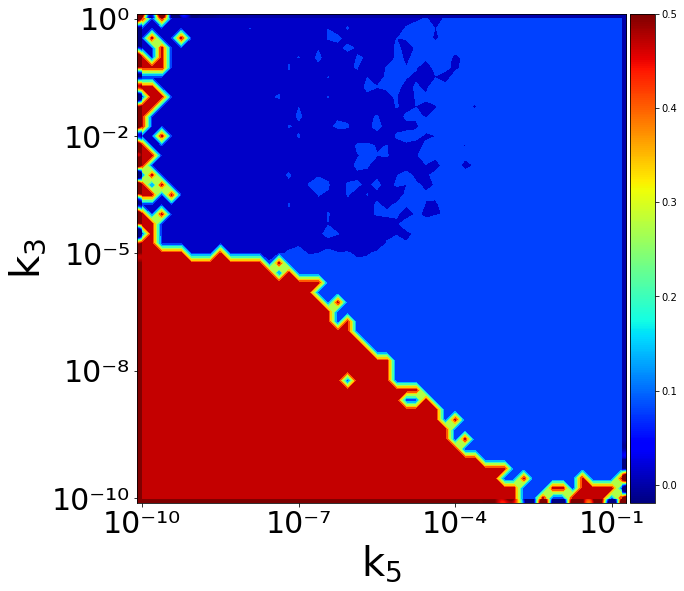

In [79]:
figure(figsize = (12,9))
ax1=plt.subplot(1, 1, 1)

newmatrix=np.flip(np.average(phase_matrix_xr_vs_fus[:,:,:],axis=2),0)
#m = ax1.imshow(newmatrix,cmap = 'jet')
contour_m = contourf(newmatrix,cmap='jet')
m = ax1.imshow(newmatrix,cmap = 'jet',interpolation='lanczos')
plt.ylabel('$\mathregular{k_3}$',fontsize=40)
plt.xlabel('$\mathregular{k_5}$',fontsize=40)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)

y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT EIGHT}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FIVE}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT TWO}',
              '10\N{SUPERSCRIPT ZERO}']
ax1.set_yticks([49,36,24,12,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=30)

x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,16,32,48])
ax1.set_xticklabels(x_label_list,fontsize=30)
plt.savefig('k3_vs_k4_01_13_2022_jet.pdf')

# 7. Checking shape in phase diagram

ready


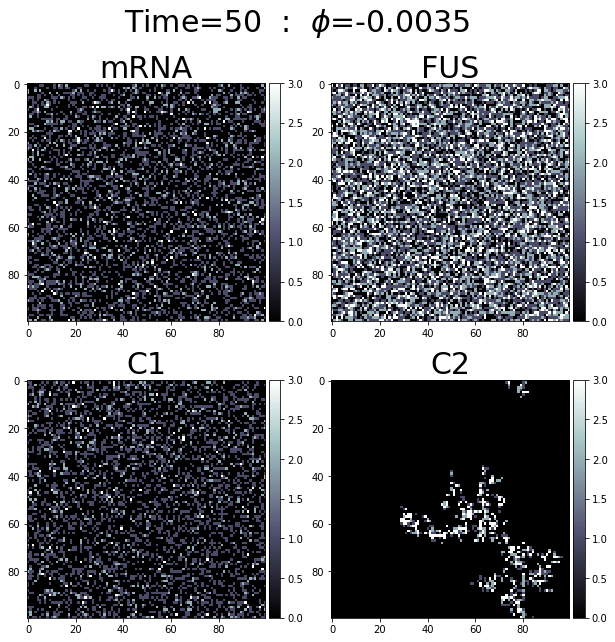

In [102]:
replicate=1
counting=0
N1 = [6.866e-05]
N2 = [1.326e-09]
for x1 in N1:
    for x2 in N2:
        counting=counting+1
        filename1 =dir+"k3_%0.3e_and_k5_%0.3e_100x100.lm"%(x1,x2)
        theta_data = phi_function(filename1)
        fp1 = h5py.File(filename1, "r")
        lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
        startTimestep=0
        endTimestep=len(times1)
        count=0
        #print(lattices)
        lattices=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())
        for lattice in lattices:
            if 49<int(lattice)<51:
                fig=figure(figsize = (10,10));
                plt.suptitle("Time=%0.3s  :  $\phi$=%0.7s"%(int(lattice),np.round(theta_data,10)), fontsize=30)
                lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
                SumParticlesX2=np.sum(lfull==0,axis=3) #Count Particles of Type X1
                TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
                ax1 = plt.subplot(2,2, 1);
                plt.title('mRNA', fontsize=30)
                m = ax1.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=3,cmap=cm.bone);
                divider = make_axes_locatable(ax1)
                cax = divider.append_axes("right", size="5%", pad=0.05)
                plt.colorbar(m, cax=cax)


                SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
                TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
                ax2 = plt.subplot(2,2, 2);
                m = ax2.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=3,cmap=cm.bone);
                plt.title('FUS', fontsize=30)
                divider = make_axes_locatable(ax2)
                cax = divider.append_axes("right", size="5%", pad=0.05)
                plt.colorbar(m, cax=cax)

                SumParticlesX2=np.sum(lfull==2,axis=3) #Count Particles of Type X1
                TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
                ax3 = plt.subplot(2,2, 3);
                m = ax3.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=3,cmap=cm.bone);
                plt.title('C1', fontsize=30)
                divider = make_axes_locatable(ax3)
                cax = divider.append_axes("right", size="5%", pad=0.05)
                plt.colorbar(m, cax=cax)

                SumParticlesX2=np.sum(lfull==3,axis=3) #Count Particles of Type X1
                TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
                ax4 = plt.subplot(2,2, 4);
                plt.title('C2', fontsize=30)
                m = ax4.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=3,cmap=cm.bone);
                divider = make_axes_locatable(ax4)
                cax = divider.append_axes("right", size="5%", pad=0.05)
                plt.colorbar(m, cax=cax)
                plt.savefig("k3_%0.3e_and_k5_%0.3e_100x100_lat_%0.3s.pdf"%(x1,x2,int(lattice)));
                #plt.close(fig)
print("ready")